In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



In [2]:
logins = pd.read_csv("weekly_logins.csv")

In [3]:
logins = logins.sort_values(by = 'Weekly Logins', ascending = False)
logins.head()

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
1267,Charlie Hurrell,No,/tool/storyboard,Yes,39,17,Visa,Technology,>$10B,West,No,Yes,Yes,Yes,/mail.google.com,198.199.120.102,6,No,Yes
341,Paul Krupp,Yes,/tool/storyboard,Yes,169,17,Lucky Brand,Consumer Products,$100M - $500M,West,No,No,No,Yes,/slack.com,138.197.222.35,4,Yes,No
452,Brigid Watson,No,/tool/storyboard,Yes,39,17,Siemon,Manufacturing,$100M - $500M,Midwest,No,No,Yes,Yes,hotels.com,192.200.200.99,14,Yes,Yes
578,George Palmer,Yes,/tool/storyboard,Yes,39,17,SpaceX,Technology,$1B - $10B,West,No,Yes,No,No,/quora,174.138.54.49,9,No,No
1202,Claudia Wilson,No,/tool/storyboard,Yes,169,17,Visa,Technology,>$10B,West,No,Yes,Yes,Yes,/facebook.com,198.199.120.102,5,Yes,No


<AxesSubplot:xlabel='Weekly Logins,Had Free Trial'>

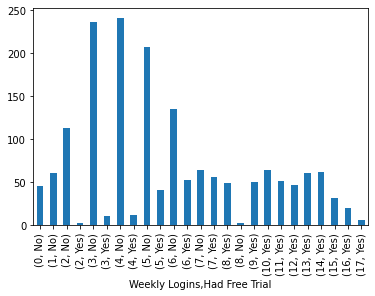

In [4]:
logins1 = logins[['Weekly Logins','Had Free Trial']]
#logins1['Yes'] = logins[]
logins1.groupby('Weekly Logins')['Had Free Trial'].value_counts().plot(kind = 'bar')

We can see that those who had a free trial were more likely to have the most weekly logins. 

<AxesSubplot:>

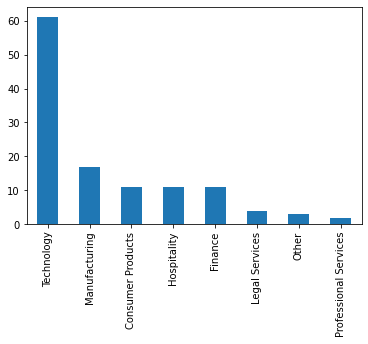

In [5]:
logins2 = logins[logins['Weekly Logins'] > 13]
logins2['Industry'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

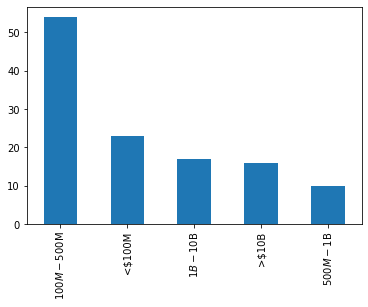

In [6]:
logins2['Company Size'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

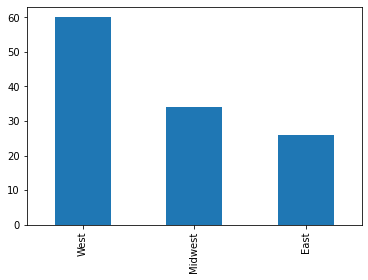

In [7]:
logins2['Territory'].value_counts().plot(kind = 'bar')

Looking at just the data on people who had more than 13 weekly logins, we can see that most of these people worked in the technology industry and in the west coast. Most of these people also work at large companies of size 100M - 500M.

In [34]:
logins3 = logins.replace({'Zendesk Integration': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Had Free Trial': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Sales Call in Trial': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Salesforce Integration': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Gmail Integration': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Used Admin Panel': {'Yes': 1, 
                                'No': 0}})
logins3 = logins3.replace({'Has Issued Support Request': {'Yes': 1, 
                                'No': 0}})

logins3

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
1267,Charlie Hurrell,No,/tool/storyboard,1,39,17,Visa,Technology,>$10B,West,0,1,1,1,/mail.google.com,198.199.120.102,6,0,1
341,Paul Krupp,Yes,/tool/storyboard,1,169,17,Lucky Brand,Consumer Products,$100M - $500M,West,0,0,0,1,/slack.com,138.197.222.35,4,1,0
452,Brigid Watson,No,/tool/storyboard,1,39,17,Siemon,Manufacturing,$100M - $500M,Midwest,0,0,1,1,hotels.com,192.200.200.99,14,1,1
578,George Palmer,Yes,/tool/storyboard,1,39,17,SpaceX,Technology,$1B - $10B,West,0,1,0,0,/quora,174.138.54.49,9,0,0
1202,Claudia Wilson,No,/tool/storyboard,1,169,17,Visa,Technology,>$10B,West,0,1,1,1,/facebook.com,198.199.120.102,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,Jessica Arce,No,/tool/search,0,39,0,Veritext,Hospitality,<$100M,Midwest,0,0,0,1,hotels.com,34.87.141.207,5,0,1
133,Kenneth Janssen,No,/tool/search,0,169,0,Hushmail,Technology,$100M - $500M,West,1,1,0,1,zoom.com,191.96.42.80,12,1,0
519,Roland Grimaud,No,/tool/search,0,169,0,Siemon,Manufacturing,$100M - $500M,Midwest,0,1,1,1,/tripadvisor.com,72.35.40.34,11,1,0
670,Jose Smith,No,/tool/search,0,169,0,Stupp Bros,Manufacturing,$100M - $500M,Midwest,1,1,0,0,/tripadvisor.com,198.199.120.102,13,0,1


In [48]:
logins3.groupby('Weekly Logins').mean()

,Had Free Trial,User MRR,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
Weekly Logins,,,,,,,,,
0,0.000000,233.888889,0.444444,0.533333,0.244444,0.466667,10.533333,0.466667,0.555556
1,0.000000,187.333333,0.333333,0.466667,0.433333,0.550000,10.050000,0.450000,0.400000
2,0.017391,164.304348,0.365217,0.478261,0.382609,0.600000,9.834783,0.356522,0.547826
3,0.040650,248.349593,0.422764,0.536585,0.463415,0.552846,9.589431,0.365854,0.536585
4,0.047431,197.379447,0.347826,0.537549,0.387352,0.561265,9.873518,0.438735,0.525692
5,0.165323,232.306452,0.358871,0.504032,0.427419,0.580645,9.943548,0.451613,0.516129
6,0.281915,224.425532,0.388298,0.632979,0.436170,0.521277,10.117021,0.468085,0.563830
7,0.466667,194.916667,0.425000,0.483333,0.425000,0.533333,10.116667,0.475000,0.616667
8,0.960784,151.352941,0.392157,0.549020,0.411765,0.529412,10.196078,0.372549,0.470588


This table further shows that having a free trial increases the likelihood that a person will have a high number weekly logins. For all other variables, there does not seem to be any impact on whether a person will have a high number of weekly logins or not. 